# Projeto Airbnb Rio de Janeiro

## Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import pathlib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score as rs

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

## Fazendo a importação dos dados do airbnb

In [4]:
meses = {'jan': 1, 'fev': 2, 'mar': 3, 'abr': 4,'mai': 5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

path_bs = pathlib.Path('dataset')

bs_airbnb = pd.DataFrame()

for arquivo in path_bs.iterdir():
    
    df = pd.read_csv(path_bs / arquivo.name)
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))
    
    df['ano'] = ano
    df['mes'] = mes
    bs_airbnb = bs_airbnb.append(df)

C:\Users\julio\anaconda3\envs\novo-ambiente\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (62,87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\julio\anaconda3\envs\novo-ambiente\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\julio\anaconda3\envs\novo-ambiente\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (87) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
display(bs_airbnb)

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

## Ànalise qualitativa

In [6]:
print(list(bs_airbnb.columns))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

- Temos muitas colunas (108). Por isso, nosso código pode ficar bem lento
- vamos retirar algumas colunas que são desnecessárias
- vamos criar um arquivo no excel com os primeiros 1.000 dados para a ánalise
- colunas que devem ser retiradas:

    1. id´s, links, e iformações não relevantes
    2. colunas repetidas ou muito parecidas
    3. colunas de texto livre
    4. colunas vazias ou quase vazias
    

In [7]:
bs_airbnb.head(1000).to_csv('primeiros_mil_registros.csv', sep=';')

In [9]:
print(bs_airbnb['experiences_offered'].value_counts())

none    902210
Name: experiences_offered, dtype: int64


In [10]:
print((bs_airbnb["host_listings_count"]==bs_airbnb["host_total_listings_count"]).value_counts())

True     901750
False       460
dtype: int64


In [11]:
print(bs_airbnb['host_acceptance_rate'].value_counts())

100%    31697
0%       4744
50%      3781
99%      3320
67%      3140
        ...  
28%        22
15%        21
7%         20
51%        18
6%         11
Name: host_acceptance_rate, Length: 100, dtype: int64


In [12]:
bs_airbnb["square_feet"].isnull().sum()

888162

## Após a análise qualitativa, restaram as seguintes colunas:

    - host_response_time	
    - host_response_rate	
    - host_is_superhost	
    - host_total_listings_count	
    - latitude	
    - longitude	
    - property_type	
    - room_type	
    - accommodates	
    - bathrooms	bedrooms	
    - beds	
    - bed_type	
    - amenities	
    - price	
    - security_deposit	
    - cleaning_fee	
    - guests_included	
    - extra_people	
    - minimum_nights	
    - maximum_nights	
    - number_of_reviews	
    - review_scores_rating	
    - review_scores_accuracy	
    - review_scores_cleanliness	
    - review_scores_checkin	
    - review_scores_communication	
    - review_scores_location	
    - review_scores_value	
    - instant_bookable	
    - is_business_travel_ready	
    - cancellation_policy	
    - ano	
    - mes																																																																												


## Criando uma nova base

In [13]:
colunas = ['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_total_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']

bs_airbnb = bs_airbnb.loc[:, colunas]
display(bs_airbnb)

host_response_time host_response_rate host_is_superhost  \
0                     NaN                NaN                 f   
1          within an hour               100%                 t   
2          within an hour               100%                 f   
3          within an hour               100%                 f   
4          within an hour               100%                 t   
...                   ...                ...               ...   
34324      within an hour                93%                 f   
34325                 NaN                NaN                 f   
34326  within a few hours                74%                 f   
34327                 NaN                NaN                 f   
34328  a few days or more                38%                 f   

       host_total_listings_count   latitude  longitude property_type  \
0                            1.0 -22.946854 -43.182737     Apartment   
1                            2.0 -22.965919 -43.178962   Condominium   
2                            1.0 -22.985698 -43.201935     Apartment   
3                            3.0 -22.977117 -43.190454     Apartment   
4                            1.0 -22.983024 -43.214270     Apartment   
...                          ...        ...        ...           ...   
34324                        0.0 -23.003180 -43.342840     Apartment   
34325                        0.0 -22.966640 -43.393450     Apartment   
34326                       32.0 -22.962080 -43.175520     Apartment   
34327                        0.0 -23.003400 -43.341820     Apartment   
34328                        5.0 -23.010560 -43.363350     Apartment   

             room_type  accommodates  bathrooms  ...  \
0      Entire home/apt             4        1.0  ...   
1      Entire home/apt             5        1.0  ...   
2      Entire home/apt             2        1.0  ...   
3      Entire home/apt             3        1.0  ...   
4      Entire home/apt             3        1.0  ...   
...                ...           ...        ...  ...   
34324  Entire home/apt             4        1.0  ...   
34325  Entire home/apt             4        2.0  ...   
34326  Entire home/apt             5        1.0  ...   
34327  Entire home/apt             4        1.0  ...   
34328     Private room             2        0.0  ...   

       review_scores_cleanliness  review_scores_checkin  \
0                            9.0                    9.0   
1                            9.0                   10.0   
2                           10.0                   10.0   
3                           10.0                   10.0   
4                           10.0                   10.0   
...                          ...                    ...   
34324                        NaN                    NaN   
34325                        NaN                    NaN   
34326                        NaN                    NaN   
34327                        NaN                    NaN   
34328                        NaN                    NaN   

      review_scores_communication review_scores_location review_scores_value  \
0                             9.0                    9.0                 9.0   
1                            10.0                    9.0                 9.0   
2                            10.0                   10.0                 9.0   
3                            10.0                   10.0                 9.0   
4                            10.0                   10.0                 9.0   
...                           ...                    ...                 ...   
34324                         NaN                    NaN                 NaN   
34325                         NaN                    NaN                 NaN   
34326                         NaN                    NaN                 NaN   
34327                         NaN                    NaN                 NaN   
34328                         NaN                    NaN                 NaN   

      

## Vamos tratar os dados vazios

In [14]:
bs_airbnb.isnull().sum()

host_response_time             401843
host_response_rate             401846
host_is_superhost                 460
host_total_listings_count         460
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                        1724
bedrooms                          850
beds                             2502
bed_type                            0
amenities                           0
price                               0
security_deposit               421280
cleaning_fee                   313506
guests_included                     0
extra_people                        0
minimum_nights                      0
maximum_nights                      0
number_of_reviews                   0
review_scores_rating           448016
review_scores_accuracy         448586
review_scores_cleanliness      448413
review_scores_checkin          448650
review_score

## Vamos eliminar as colunas com um número muito grande de valores faltantes (NaN)

- Ao vizualizar os dados, podemos ver que existe um número bem grande de valores faltando. Portanto iremos excluir as colunas que tiverem mais de 30% dos valores vazios.

- O restante das colunas com valores vazios, iremos substituir por valores que façam sentido dentro das respectivas colunas

- A subtituição acontecerá da pelos seguintes critérios:

    - Para colunas de texto, iremos substituir pelo valor que mais aparece (moda)
    - Para colunas numéricas, vamos substituir pela média dos valores

In [15]:
for x in bs_airbnb:
    if bs_airbnb[x].isnull().sum() > 300000:
        bs_airbnb = bs_airbnb.drop(x, axis=1)
        
display(bs_airbnb)

host_is_superhost  host_total_listings_count   latitude  longitude  \
0                     f                        1.0 -22.946854 -43.182737   
1                     t                        2.0 -22.965919 -43.178962   
2                     f                        1.0 -22.985698 -43.201935   
3                     f                        3.0 -22.977117 -43.190454   
4                     t                        1.0 -22.983024 -43.214270   
...                 ...                        ...        ...        ...   
34324                 f                        0.0 -23.003180 -43.342840   
34325                 f                        0.0 -22.966640 -43.393450   
34326                 f                       32.0 -22.962080 -43.175520   
34327                 f                        0.0 -23.003400 -43.341820   
34328                 f                        5.0 -23.010560 -43.363350   

      property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0         Apartment  Entire home/apt             4        1.0       0.0   2.0   
1       Condominium  Entire home/apt             5        1.0       2.0   2.0   
2         Apartment  Entire home/apt             2        1.0       1.0   1.0   
3         Apartment  Entire home/apt             3        1.0       1.0   2.0   
4         Apartment  Entire home/apt             3        1.0       1.0   2.0   
...             ...              ...           ...        ...       ...   ...   
34324     Apartment  Entire home/apt             4        1.0       0.0   2.0   
34325     Apartment  Entire home/apt             4        2.0       2.0   3.0   
34326     Apartment  Entire home/apt             5        1.0       1.0   2.0   
34327     Apartment  Entire home/apt             4        1.0       1.0   1.0   
34328     Apartment     Private room             2        0.0       1.0   1.0   

       ... guests_included extra_people minimum_nights  maximum_nights  \
0      ...               2       $34.00             60             365   
1      ...               2       $51.00              4              90   
2      ...               2      $215.00              3              90   
3      ...               2       $45.00              4              30   
4      ...               2       $68.00              2            1125   
...    ...             ...          ...            ...             ...   
34324  ...               2       $50.00              1            1125   
34325  ...               1        $0.00              2            1125   
34326  ...               3       $30.00              3            1125   
34327  ...               1        $0.00              1            1125   
34328  ...               2       $80.00              1              30   

      number_of_reviews  instant_bookable  is_business_travel_ready  \
0                    38                 f                         f   
1                   205                 t                         f   
2                    85                 f                         f   
3                   208                 f                         f   
4                   200                 t                         f   
...                 ...               ...                       ...   
34324                 0                 f                         f   
34325                 0                 f                         f   
34326                 0                 f                         f   
34327                 0                 f                         f   
34328                 0                 f                         f   

               cancellation_policy   ano mes  
0      strict_14_with_grace_period  2018   4  
1                           strict  2018   4  
2                           strict  2018   4  
3                           strict  2018   4  
4                           strict  2018   4  
...                            ...   ...  ..  
34324                     flexible  2019   9  
34

In [16]:
bs_airbnb.isnull().sum()

host_is_superhost             460
host_total_listings_count     460
latitude                        0
longitude                       0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                    1724
bedrooms                      850
beds                         2502
bed_type                        0
amenities                       0
price                           0
guests_included                 0
extra_people                    0
minimum_nights                  0
maximum_nights                  0
number_of_reviews               0
instant_bookable                0
is_business_travel_ready        0
cancellation_policy             0
ano                             0
mes                             0
dtype: int64

### Fazendo a substituição

In [17]:
bs_airbnb.host_is_superhost.mode()[0] # moda

'f'

In [18]:
bs_airbnb.host_total_listings_count.mean() # média

8.529062378708067

In [19]:
bs_airbnb.bathrooms.mean() # média

1.694549387775046

In [20]:
bs_airbnb.bedrooms.mean() # média

1.6446392118576374

In [21]:
bs_airbnb.beds.mean() # média

2.6001958413174053

In [22]:
bs_airbnb.loc[bs_airbnb.host_is_superhost.isnull(), 'host_is_superhost'] = bs_airbnb.host_is_superhost.mode()[0] # trocando pela moda

In [23]:
bs_airbnb.loc[bs_airbnb.host_total_listings_count.isnull(), 'host_total_listings_count'] = bs_airbnb.host_total_listings_count.mean() # Trocando pela média

In [24]:
bs_airbnb.loc[bs_airbnb.bathrooms.isnull(), 'bathrooms'] = bs_airbnb.bathrooms.mean() # Trocando pela média

In [25]:
bs_airbnb.loc[bs_airbnb.bedrooms.isnull(), 'bedrooms'] = bs_airbnb.bedrooms.mean() # Trocando pela média

In [26]:
bs_airbnb.loc[bs_airbnb.beds.isnull(), 'beds'] = bs_airbnb.beds.mean() # Trocando pela média

In [27]:
bs_airbnb.isnull().sum()

host_is_superhost            0
host_total_listings_count    0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
bed_type                     0
amenities                    0
price                        0
guests_included              0
extra_people                 0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
instant_bookable             0
is_business_travel_ready     0
cancellation_policy          0
ano                          0
mes                          0
dtype: int64

In [28]:
display(bs_airbnb)

host_is_superhost  host_total_listings_count   latitude  longitude  \
0                     f                        1.0 -22.946854 -43.182737   
1                     t                        2.0 -22.965919 -43.178962   
2                     f                        1.0 -22.985698 -43.201935   
3                     f                        3.0 -22.977117 -43.190454   
4                     t                        1.0 -22.983024 -43.214270   
...                 ...                        ...        ...        ...   
34324                 f                        0.0 -23.003180 -43.342840   
34325                 f                        0.0 -22.966640 -43.393450   
34326                 f                       32.0 -22.962080 -43.175520   
34327                 f                        0.0 -23.003400 -43.341820   
34328                 f                        5.0 -23.010560 -43.363350   

      property_type        room_type  accommodates  bathrooms  bedrooms  beds  \
0         Apartment  Entire home/apt             4        1.0       0.0   2.0   
1       Condominium  Entire home/apt             5        1.0       2.0   2.0   
2         Apartment  Entire home/apt             2        1.0       1.0   1.0   
3         Apartment  Entire home/apt             3        1.0       1.0   2.0   
4         Apartment  Entire home/apt             3        1.0       1.0   2.0   
...             ...              ...           ...        ...       ...   ...   
34324     Apartment  Entire home/apt             4        1.0       0.0   2.0   
34325     Apartment  Entire home/apt             4        2.0       2.0   3.0   
34326     Apartment  Entire home/apt             5        1.0       1.0   2.0   
34327     Apartment  Entire home/apt             4        1.0       1.0   1.0   
34328     Apartment     Private room             2        0.0       1.0   1.0   

       ... guests_included extra_people minimum_nights  maximum_nights  \
0      ...               2       $34.00             60             365   
1      ...               2       $51.00              4              90   
2      ...               2      $215.00              3              90   
3      ...               2       $45.00              4              30   
4      ...               2       $68.00              2            1125   
...    ...             ...          ...            ...             ...   
34324  ...               2       $50.00              1            1125   
34325  ...               1        $0.00              2            1125   
34326  ...               3       $30.00              3            1125   
34327  ...               1        $0.00              1            1125   
34328  ...               2       $80.00              1              30   

      number_of_reviews  instant_bookable  is_business_travel_ready  \
0                    38                 f                         f   
1                   205                 t                         f   
2                    85                 f                         f   
3                   208                 f                         f   
4                   200                 t                         f   
...                 ...               ...                       ...   
34324                 0                 f                         f   
34325                 0                 f                         f   
34326                 0                 f                         f   
34327                 0                 f                         f   
34328                 0                 f                         f   

               cancellation_policy   ano mes  
0      strict_14_with_grace_period  2018   4  
1                           strict  2018   4  
2                           strict  2018   4  
3                           strict  2018   4  
4                           strict  2018   4  
...                            ...   ...  ..  
34324                     flexible  2019   9  
34

## Vamos verificar os tipos de dados em cada coluna

In [29]:
print(bs_airbnb.dtypes)
print("*" * 80)
print(bs_airbnb.iloc[0])

host_is_superhost             object
host_total_listings_count    float64
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
amenities                     object
price                         object
guests_included                int64
extra_people                  object
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
instant_bookable              object
is_business_travel_ready      object
cancellation_policy           object
ano                            int64
mes                            int64
dtype: object
********************************************************************************
host_is_superhost                                     

### Valores que devem ser ajustados:
    - price
    - extra_people
    
- Essas colunas estão registradas como 'object', ou seja estão sendo tratadas como texto. Portanto, vamos transforma-las em 'float' já que são valores monetários

#### Price

In [30]:
bs_airbnb['price'] = bs_airbnb['price'].str.replace('$', '')
bs_airbnb['price'] = bs_airbnb['price'].str.replace(',', '')
bs_airbnb['price'] = bs_airbnb['price'].astype(np.float32, copy=False)
display(bs_airbnb['price'])

C:\Users\julio\anaconda3\envs\novo-ambiente\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0        133.0
1        270.0
2        222.0
3        161.0
4        222.0
         ...  
34324    121.0
34325    799.0
34326    420.0
34327    250.0
34328     92.0
Name: price, Length: 902210, dtype: float32

#### Extra people

In [31]:
bs_airbnb['extra_people'] = bs_airbnb['extra_people'].str.replace('$', '')
bs_airbnb['extra_people'] = bs_airbnb['extra_people'].str.replace(',', '')
bs_airbnb['extra_people'] = bs_airbnb['extra_people'].astype(np.float32, copy=False)
display(bs_airbnb['extra_people'])

C:\Users\julio\anaconda3\envs\novo-ambiente\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


0         34.0
1         51.0
2        215.0
3         45.0
4         68.0
         ...  
34324     50.0
34325      0.0
34326     30.0
34327      0.0
34328     80.0
Name: extra_people, Length: 902210, dtype: float32

In [32]:
print(bs_airbnb.dtypes)

host_is_superhost             object
host_total_listings_count    float64
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
amenities                     object
price                        float32
guests_included                int64
extra_people                 float32
minimum_nights                 int64
maximum_nights                 int64
number_of_reviews              int64
instant_bookable              object
is_business_travel_ready      object
cancellation_policy           object
ano                            int64
mes                            int64
dtype: object


## Ánalise exploratória dos dados (EDA) e verificação de outliers

- Analisar as features e examinar as correlações entre os dados.

- Excluir outliers usando o conceito estatístico do quartil:


    - Vamos utilizar como padrão:
    - Valores abaixo de Q1 - 1,5 * amplitude, e valores acima de Q3 + 1,5 * amplitude (Aplitude = Q3 - Q1)
    
- Vamos começar pelas colunas de preço e de extra people. São valores numéricos contínuos.

- Depois vamos para a coluna de numéricos discretos (acomodates, bedrooms, beds, etc.)

- Por fim, vamos analisar as colunas de texto

<AxesSubplot:>

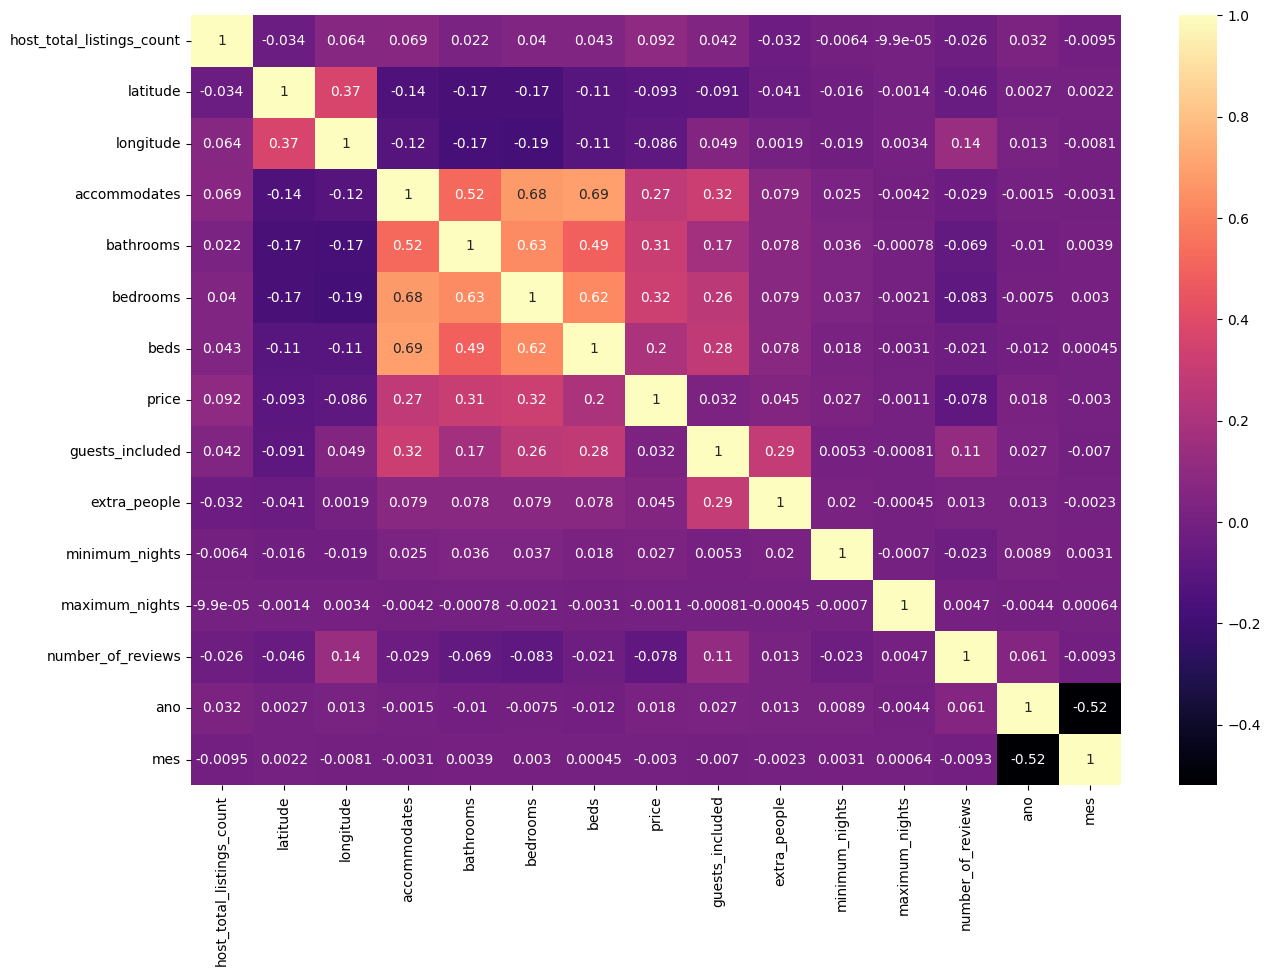

In [33]:
plt.figure(figsize=(15, 10))
sns.heatmap(bs_airbnb.corr(),annot=True,cmap='magma')

### Definição de Funções

- Vamos criar algumas funções para nos auxiliar nos processos do projeto

In [34]:
def limite(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amp = q3 - q1
    l_inf = q1 - 1.5 * amp
    l_sup = q3 + 1.5 * amp
    return l_inf, l_sup

def excluir_outliers(df, coluna):
    qt_linhas = df.shape[0]
    l_inf, l_sup = limite(df[coluna])
    df = df.loc[(df[coluna] >= l_inf) & (df[coluna] <= l_sup), :]
    linhas_excluidas = qt_linhas - df.shape[0]
    return df, linhas_excluidas

def agrupar(df, coluna, nova_coluna, limite):
    tab_text = df[coluna].value_counts()
    lista_aux = []
    for x in tab_text.index:
        if tab_text[x] < limite:
            lista_aux.append(x)
    for y in lista_aux:
        df.loc[df[coluna]==y, coluna] = nova_coluna
    return df

def avaliar_IA(modelo, y_teste, previsao):
    MAE = mae(y_teste, previsao)
    MSE = mse(y_teste, previsao)
    r2 = rs(y_teste, previsao)
    return f'Modelo {modelo}:\nR²:{r2}\nmae: {MAE}\nmse: {MSE}'

In [35]:
def caixa_plot(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limite(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.histplot(coluna, kde=True, stat='density')
    
def barras(coluna):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limite(coluna))
    
def graf_texto(df, coluna):
    plt.figure(figsize=(15, 5))
    grafico = sns.countplot(x=df[coluna], data=df)
    grafico.tick_params(axis= 'x', rotation=90)

## Ánalise de cada coluna com as funções auxiliares

### Price

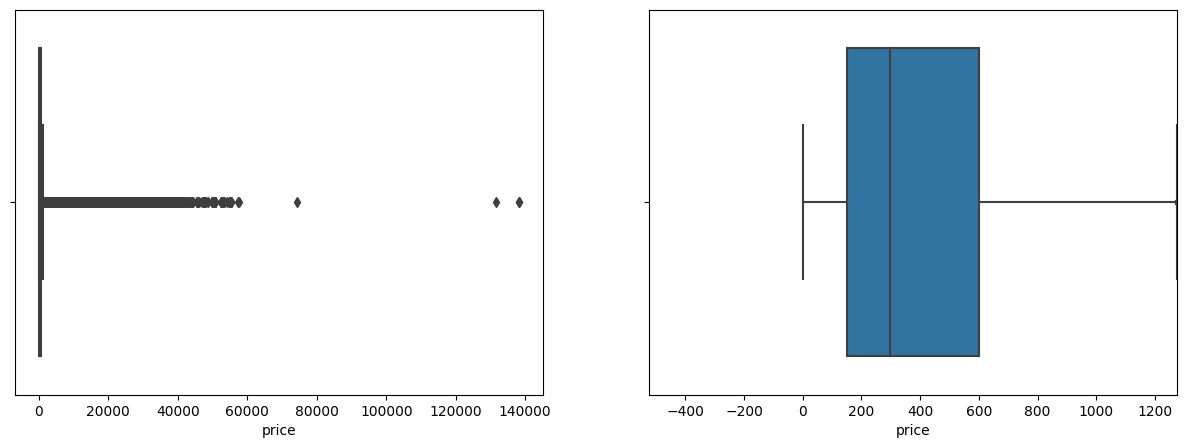

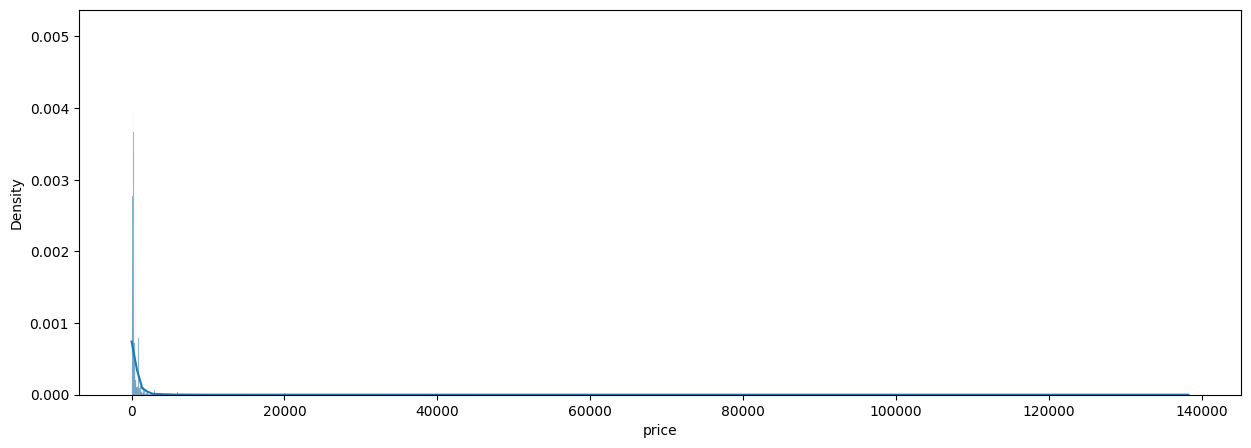

In [36]:
caixa_plot(bs_airbnb['price'])
histograma(bs_airbnb['price'])

#### Como o nosso modelo será para pessoas comuns, acredito que os valores acima do limite máximo seráo para imóveis de luxo. O que não é o escopo do nosso projeto, por isso, iremos excluir esses outliers.

In [37]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'price')
print('{} linhas removidas'.format(linhas_excluidas))

87575 linhas removidas


(814635, 23)


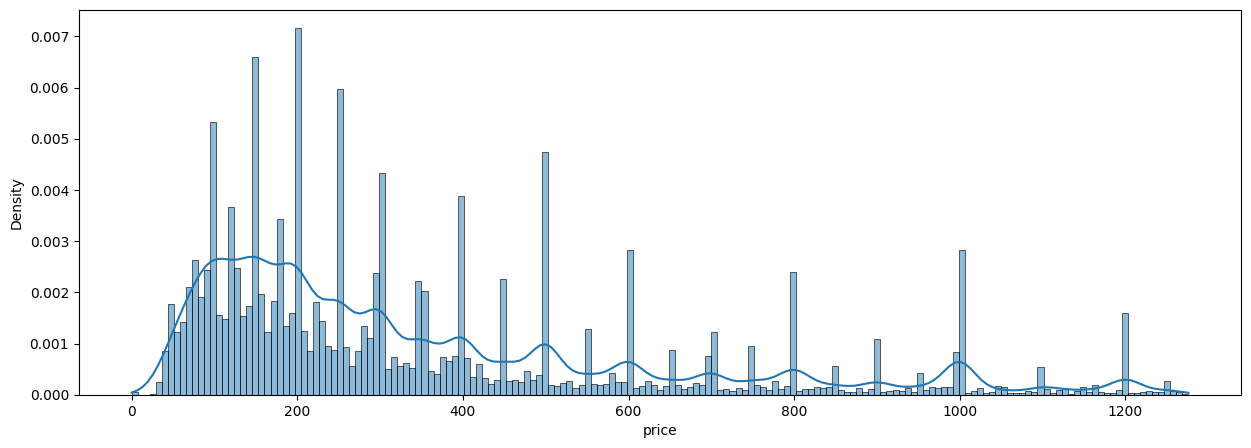

In [38]:
histograma(bs_airbnb['price'])
print(bs_airbnb.shape)

### Extra_people

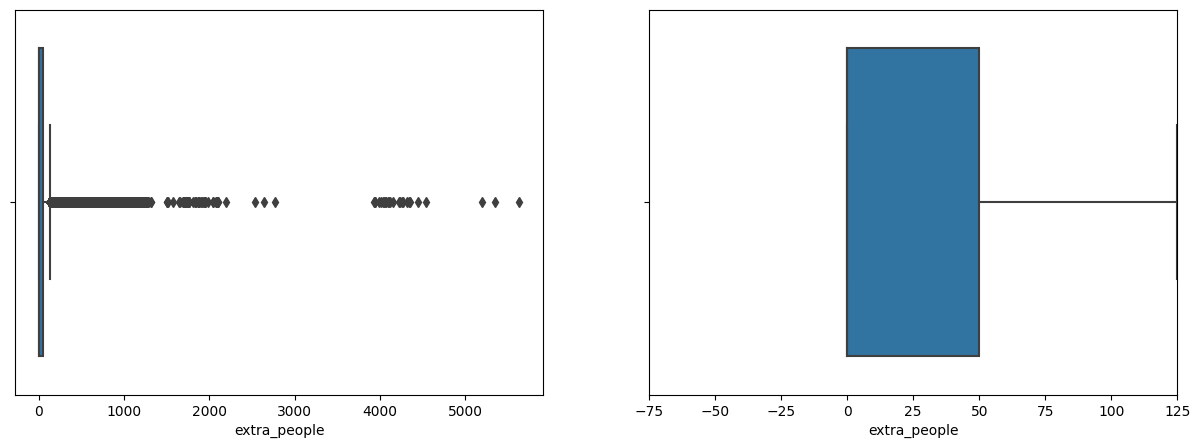

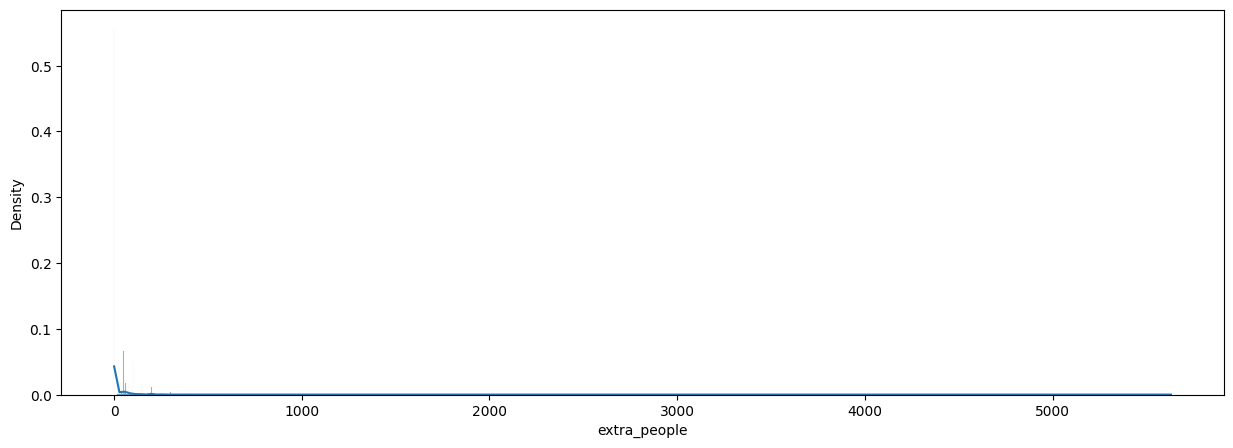

In [39]:
caixa_plot(bs_airbnb['extra_people'])
histograma(bs_airbnb['extra_people'])

In [40]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'extra_people')
print('{} linhas removidas'.format(linhas_excluidas))

59373 linhas removidas


(755262, 23)


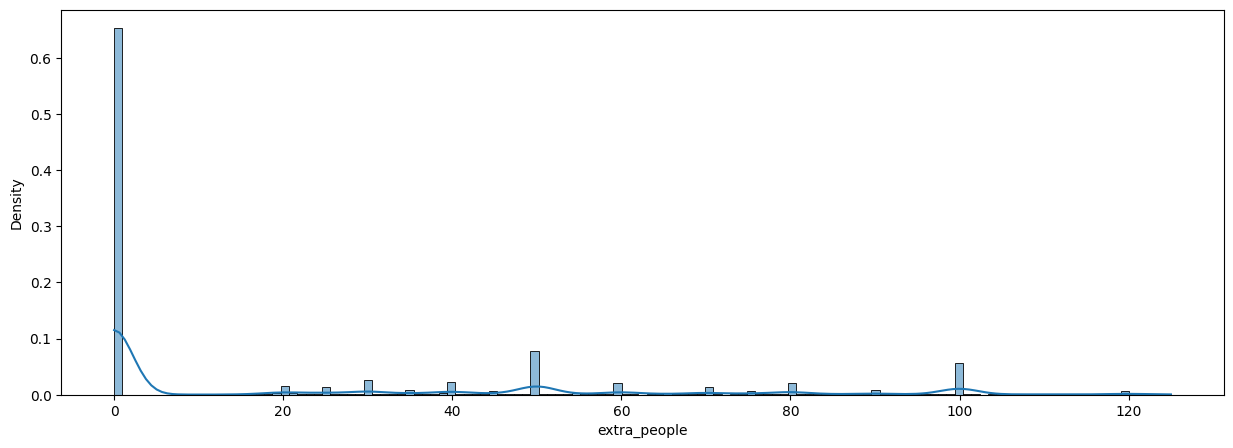

In [41]:
histograma(bs_airbnb['extra_people'])
print(bs_airbnb.shape)

### host_total_listings_count 

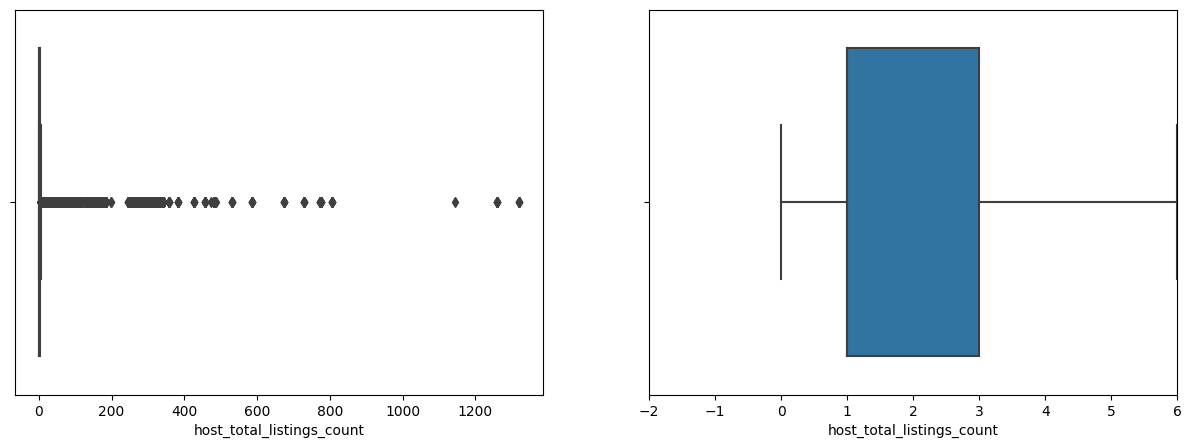

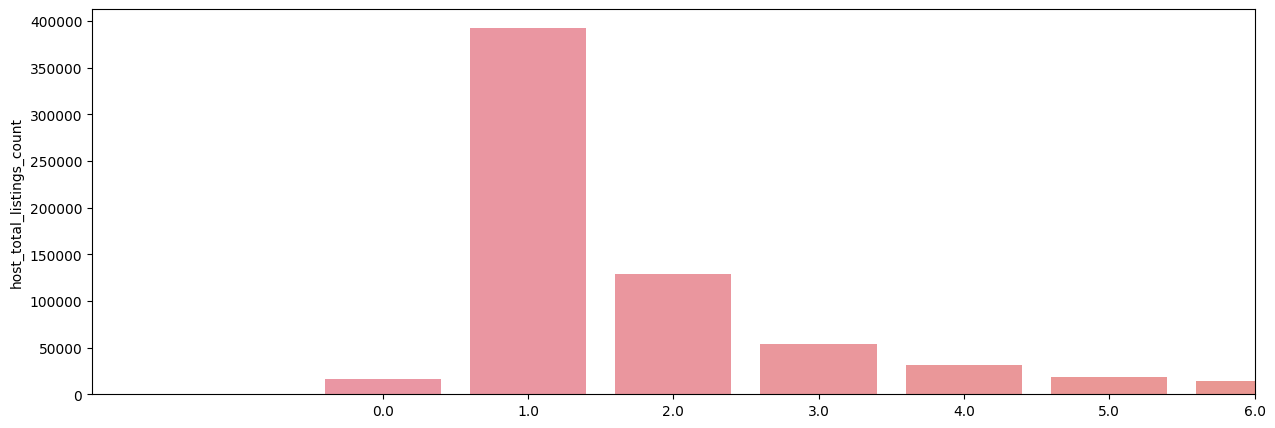

In [42]:
caixa_plot(bs_airbnb['host_total_listings_count'])
barras(bs_airbnb['host_total_listings_count'])

#### Podemos excluir os outliers porque hosts com mais de 6 imóveis não são o público alvo

In [43]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'host_total_listings_count')
print('{} linhas removidas'.format(linhas_excluidas))

98749 linhas removidas


### acommodates

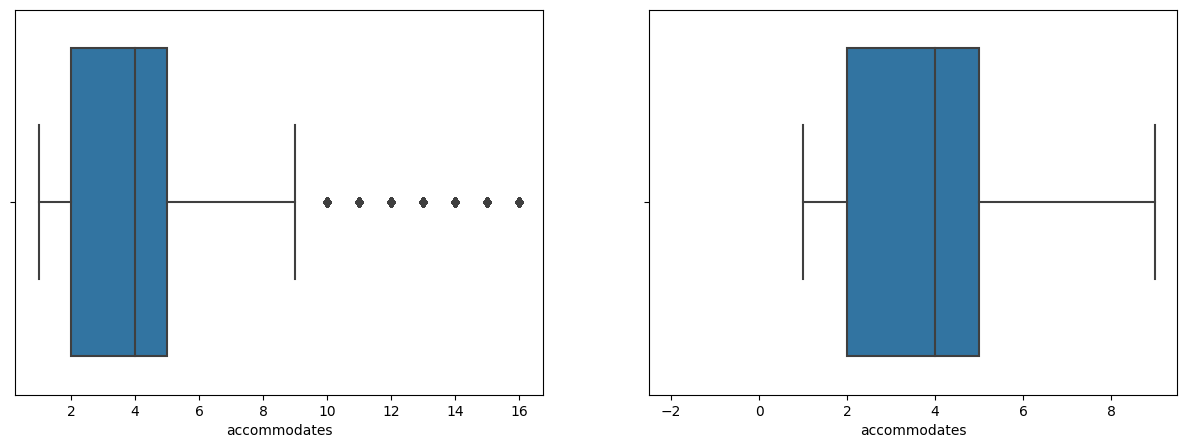

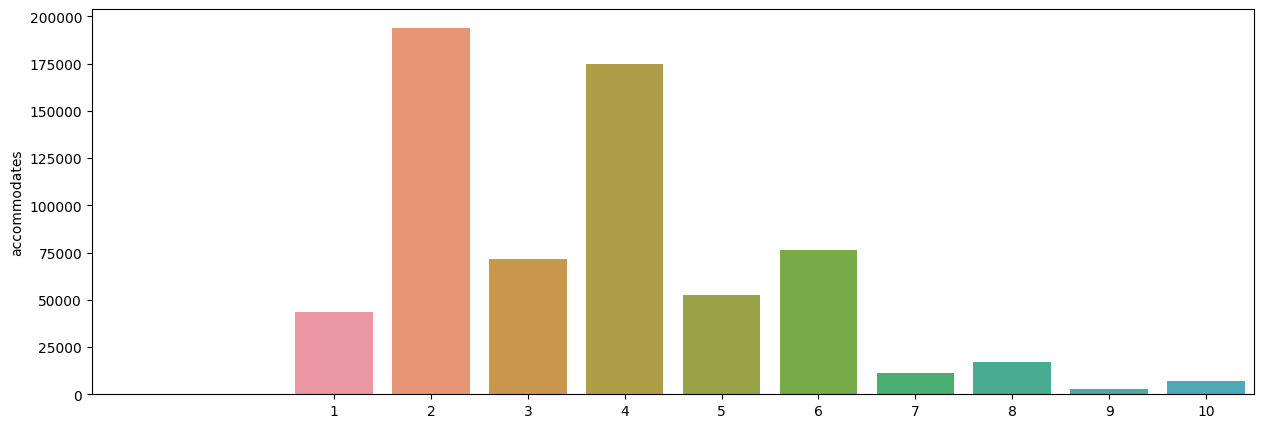

In [44]:
caixa_plot(bs_airbnb['accommodates'])
barras(bs_airbnb['accommodates'])

In [45]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'accommodates')
print('{} linhas removidas'.format(linhas_excluidas))

13183 linhas removidas


### bathrooms

<AxesSubplot:ylabel='bathrooms'>

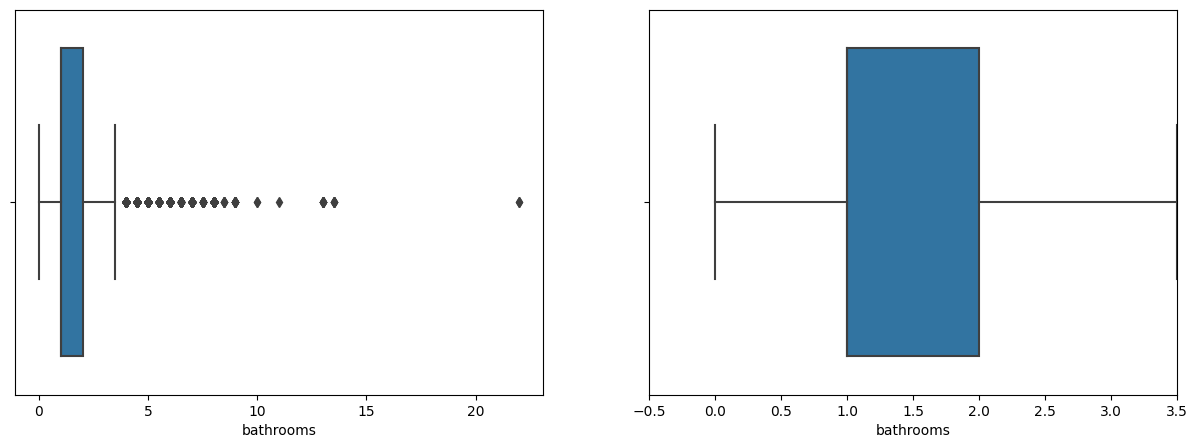

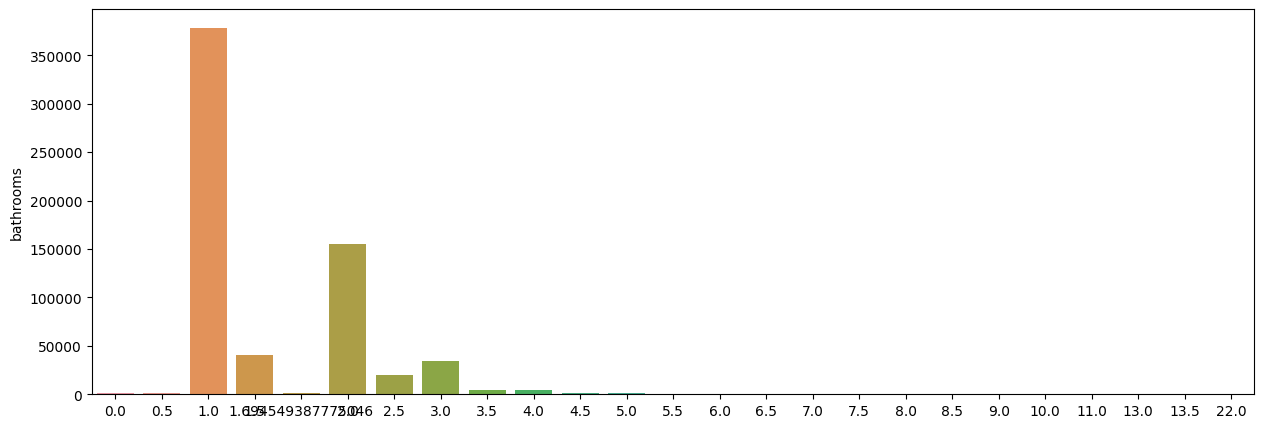

In [46]:
caixa_plot(bs_airbnb['bathrooms'])
plt.figure(figsize=(15, 5))
sns.barplot(x=bs_airbnb['bathrooms'].value_counts().index, y=bs_airbnb['bathrooms'].value_counts())

In [47]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'bathrooms')
print('{} linhas removidas'.format(linhas_excluidas))

6911 linhas removidas


### bedrooms

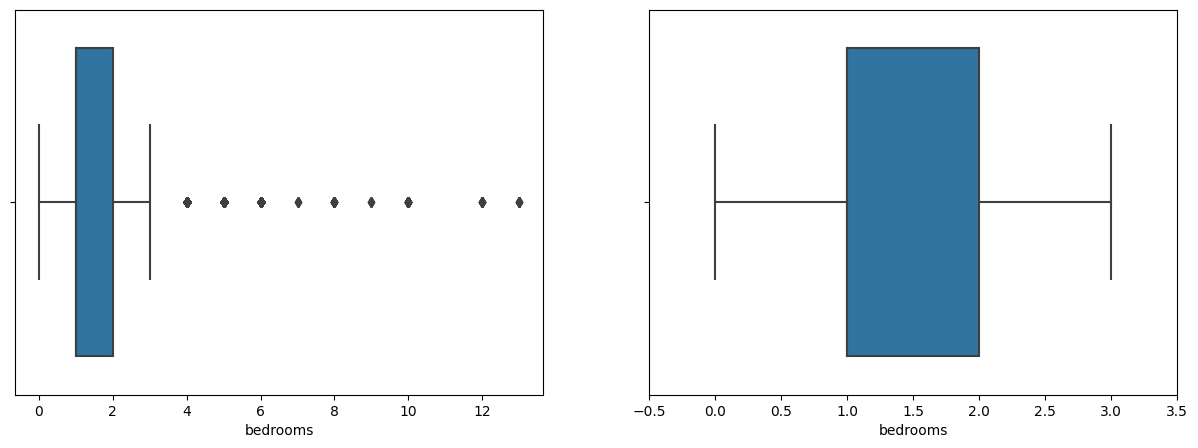

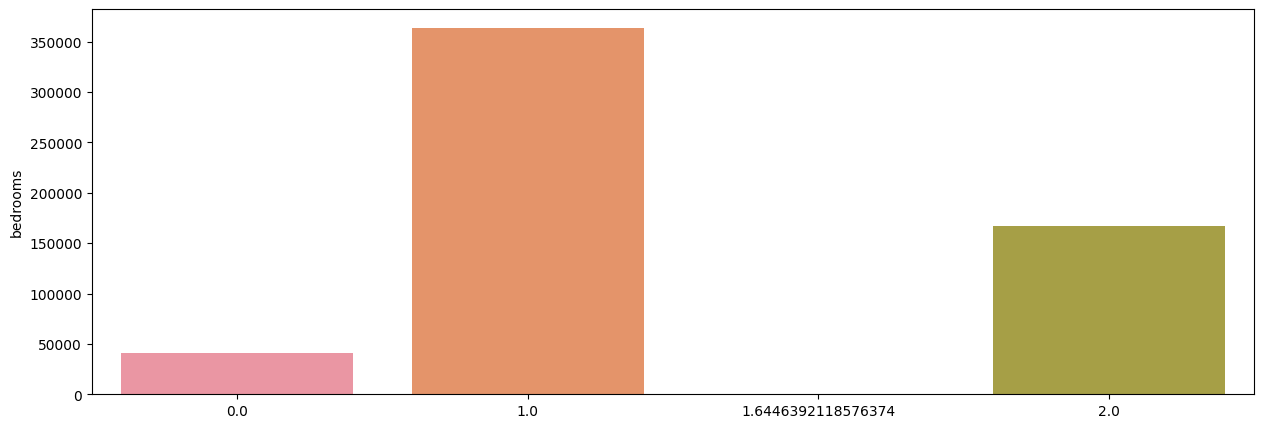

In [48]:
caixa_plot(bs_airbnb['bedrooms'])
barras(bs_airbnb['bedrooms'])

In [49]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'bedrooms')
print('{} linhas removidas'.format(linhas_excluidas))

5482 linhas removidas


### beds

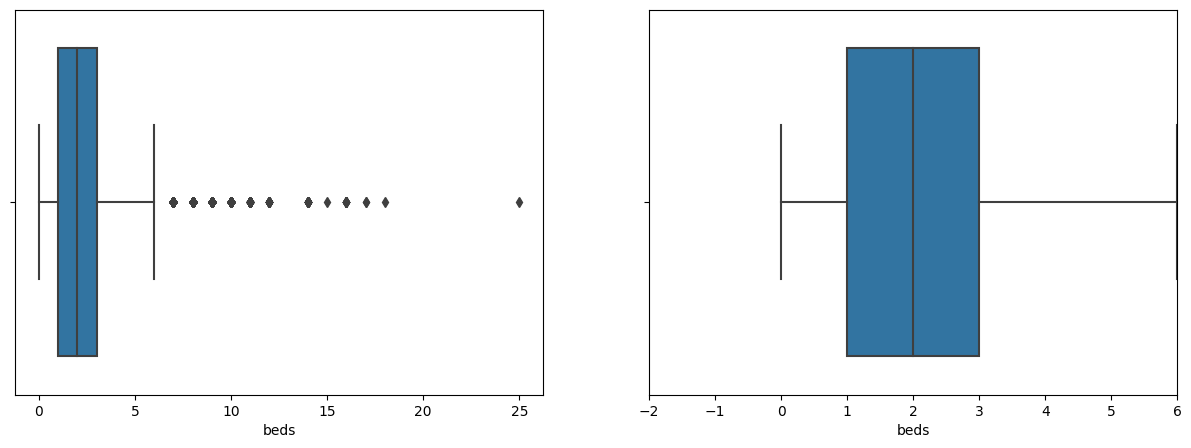

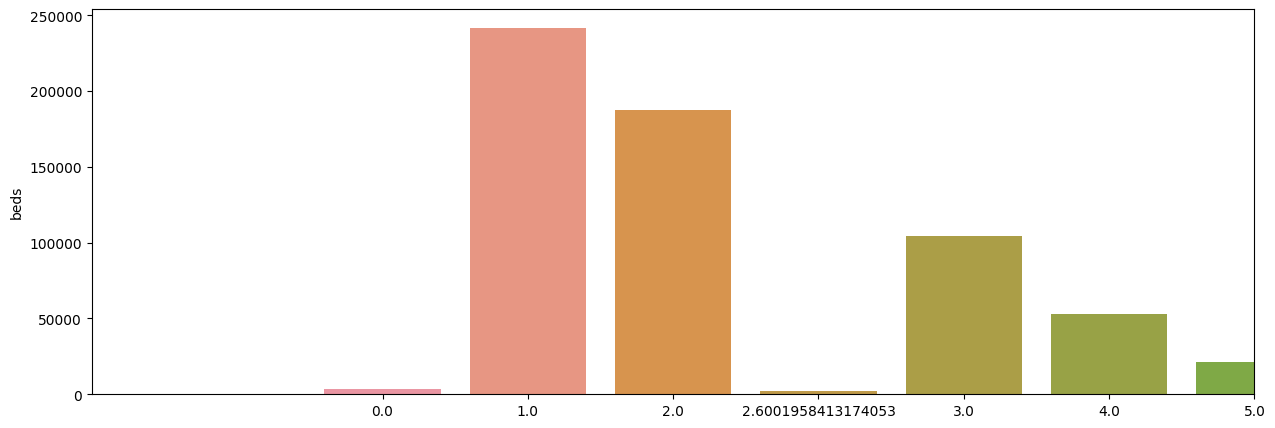

In [50]:
caixa_plot(bs_airbnb['beds'])
barras(bs_airbnb['beds'])

In [51]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'beds')
print('{} linhas removidas'.format(linhas_excluidas))

5622 linhas removidas


### guests_included

(1.0, 1.0)


<AxesSubplot:ylabel='guests_included'>

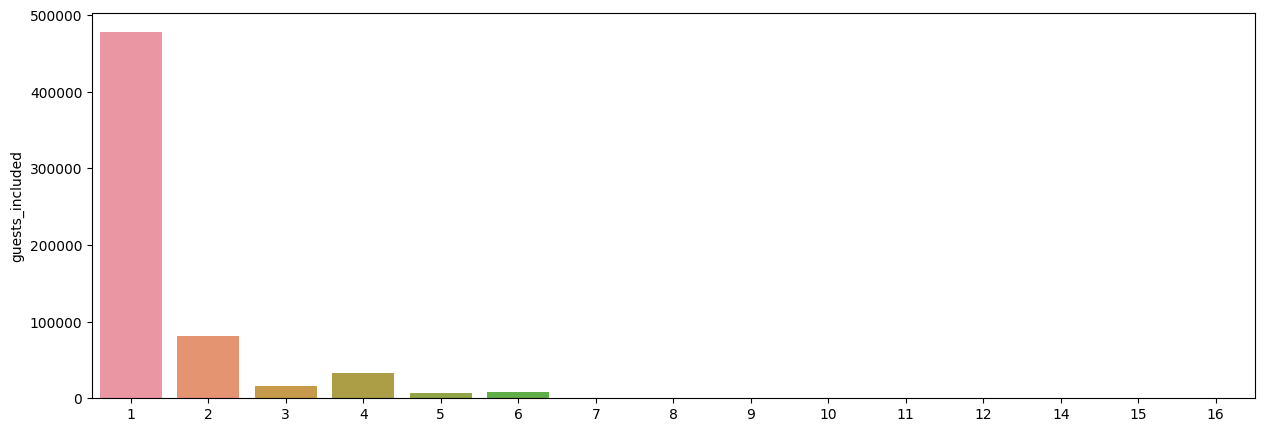

In [52]:
print(limite(bs_airbnb['guests_included']))
plt.figure(figsize=(15, 5))
sns.barplot(x=bs_airbnb['guests_included'].value_counts().index, y=bs_airbnb['guests_included'].value_counts())

#### Vamos eliminar essa feature. Aparentemente, os usuários do airbnb não preenchem corretamente esse campo. Essa feature pode levar o nosso modelo a fazer previsões erradas

In [53]:
bs_airbnb = bs_airbnb.drop('guests_included', axis=1)
bs_airbnb.shape

(625315, 22)

### minimum_nights 

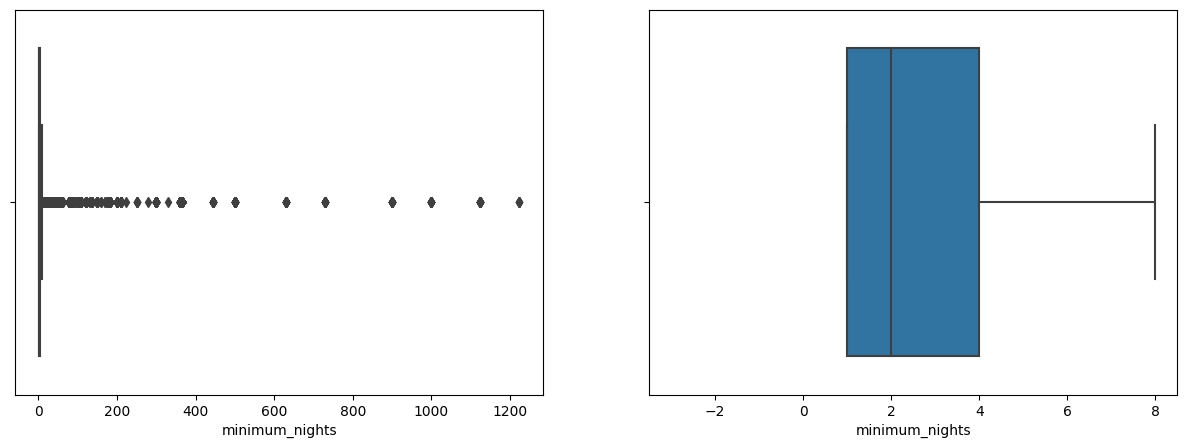

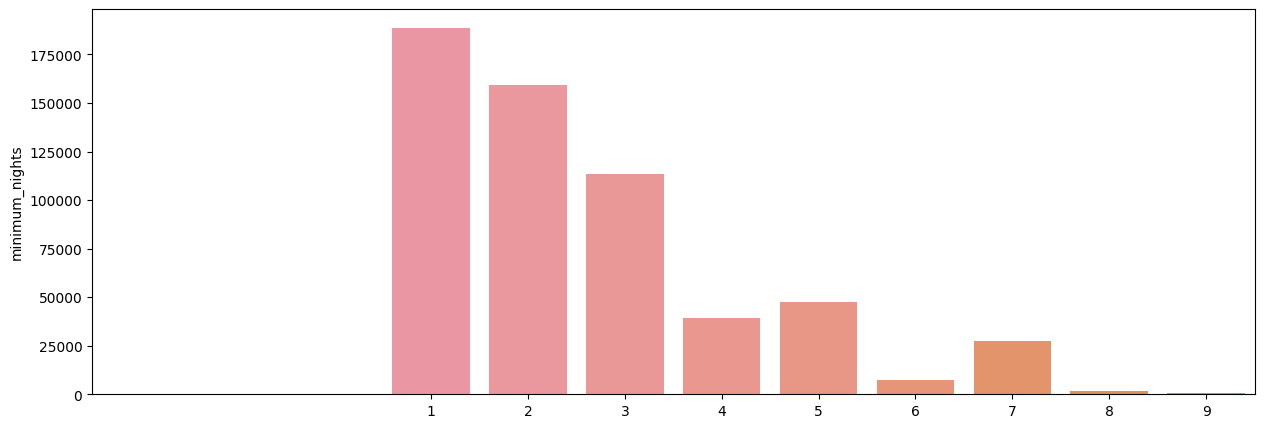

In [54]:
caixa_plot(bs_airbnb['minimum_nights'])
barras(bs_airbnb['minimum_nights'])

In [55]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'minimum_nights')
print('{} linhas removidas'.format(linhas_excluidas))

40488 linhas removidas


### maximum_nights

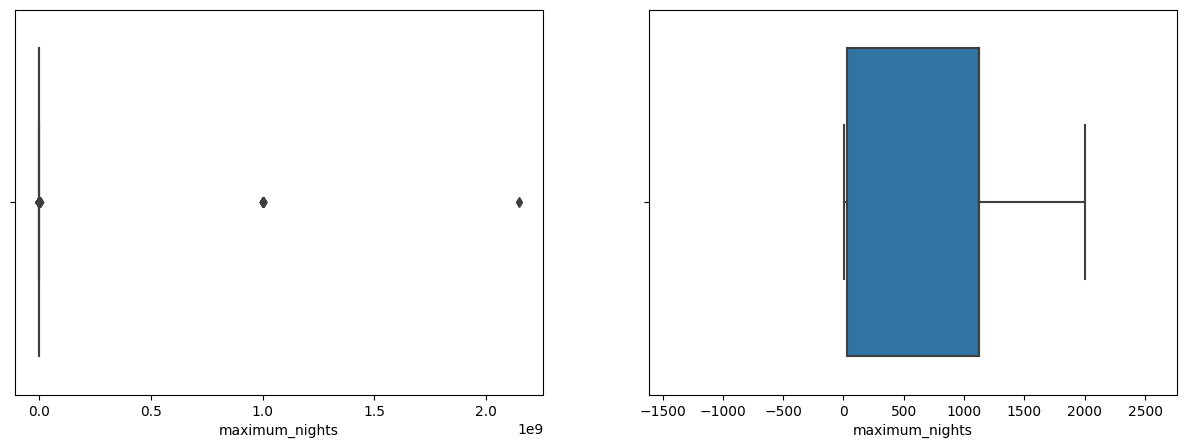

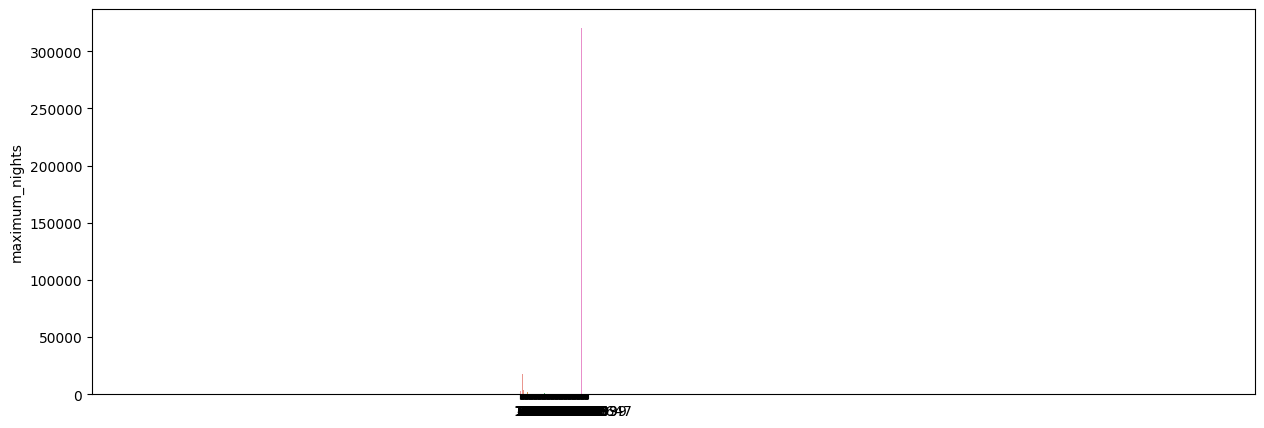

In [56]:
caixa_plot(bs_airbnb['maximum_nights'])
barras(bs_airbnb['maximum_nights'])

#### Também iremos excluir essa feature, pois não é uma boa métrica para nosso modelo

In [57]:
bs_airbnb = bs_airbnb.drop('maximum_nights', axis=1)
bs_airbnb.shape

(584827, 21)

### number_of_reviews

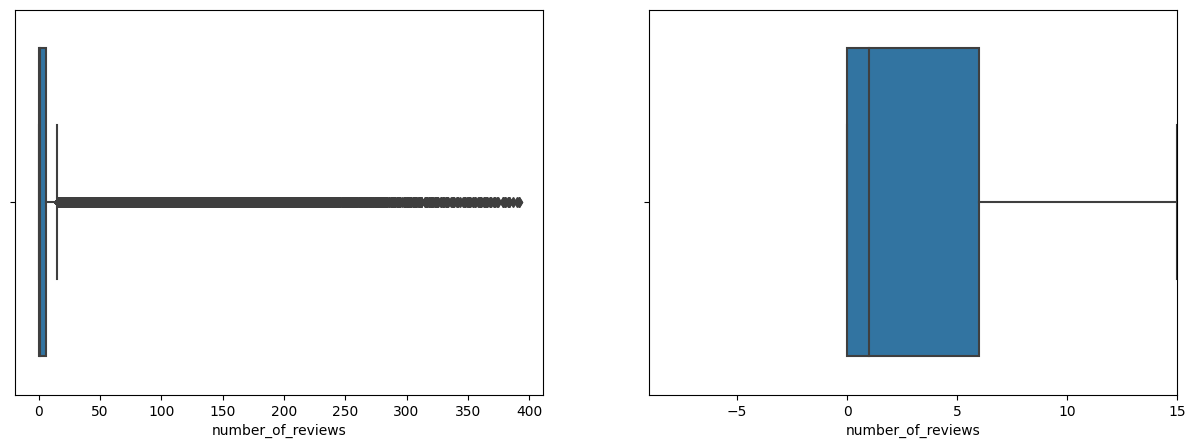

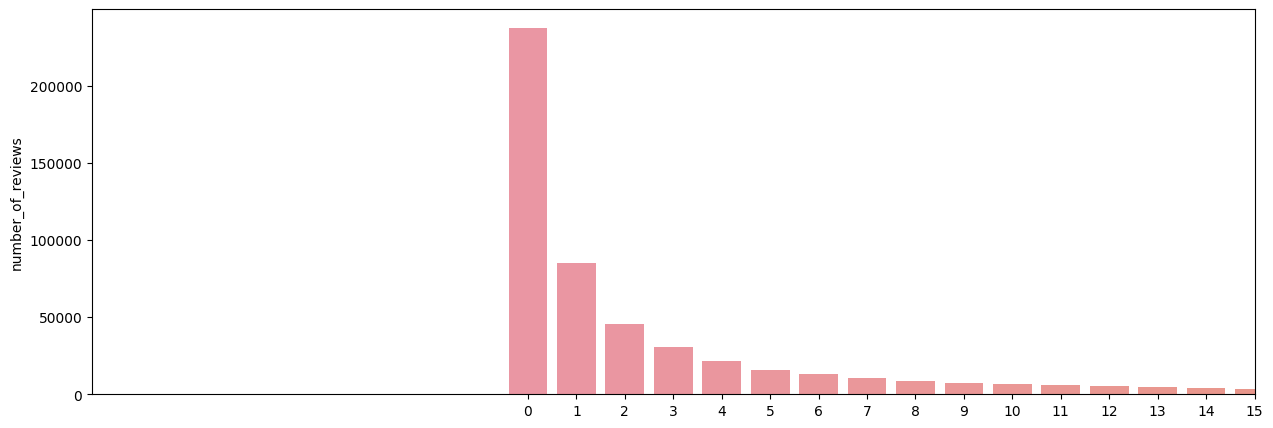

In [58]:
caixa_plot(bs_airbnb['number_of_reviews'])
barras(bs_airbnb['number_of_reviews'])

#### Vamos excluir essa feature também, pois acredito que não vá acrescentar muito no nosso modelo

In [59]:
bs_airbnb = bs_airbnb.drop('number_of_reviews', axis=1)
bs_airbnb.shape

(584827, 20)

## Tratamento em features de texto

- Devemos decidir entre:
    - agrupar os dados que tiverem uma discrepância muito grande dos demais dados
    - deixar uma coluna como está

In [60]:
print(bs_airbnb.dtypes)

host_is_superhost             object
host_total_listings_count    float64
latitude                     float64
longitude                    float64
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bedrooms                     float64
beds                         float64
bed_type                      object
amenities                     object
price                        float32
extra_people                 float32
minimum_nights                 int64
instant_bookable              object
is_business_travel_ready      object
cancellation_policy           object
ano                            int64
mes                            int64
dtype: object


### property_type

In [61]:
bs_airbnb['property_type'].value_counts()

Apartment                 460447
House                      51729
Condominium                26624
Serviced apartment         12702
Loft                       12404
Guest suite                 3622
Bed and breakfast           3524
Hostel                      2704
Guesthouse                  2157
Other                       1961
Villa                       1303
Townhouse                    969
Aparthotel                   693
Tiny house                   490
Chalet                       481
Earth house                  475
Boutique hotel               447
Hotel                        376
Casa particular (Cuba)       306
Cottage                      230
Bungalow                     207
Dorm                         187
Cabin                        141
Nature lodge                 124
Castle                        81
Treehouse                     76
Island                        54
Boat                          53
Hut                           40
Campsite                      34
Resort    

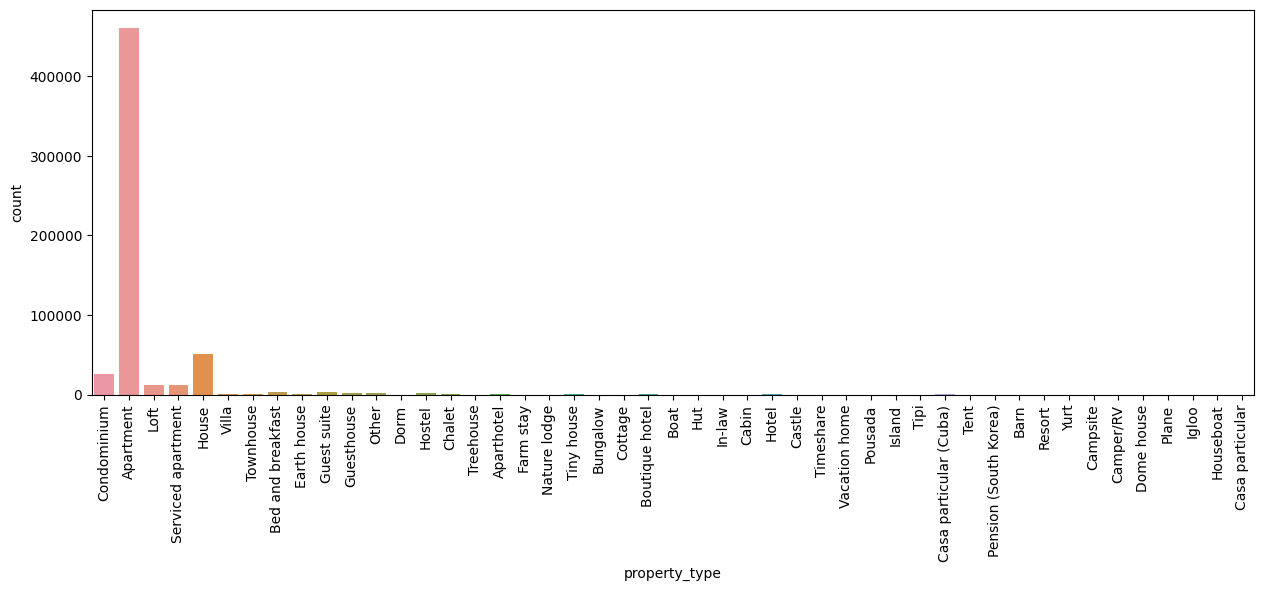

In [62]:
graf_texto(bs_airbnb, 'property_type')

In [63]:
agrupar(bs_airbnb, 'property_type', 'Outros', 2000)                  
print(bs_airbnb['property_type'].value_counts())

Apartment             460447
House                  51729
Condominium            26624
Serviced apartment     12702
Loft                   12404
Outros                  8914
Guest suite             3622
Bed and breakfast       3524
Hostel                  2704
Guesthouse              2157
Name: property_type, dtype: int64


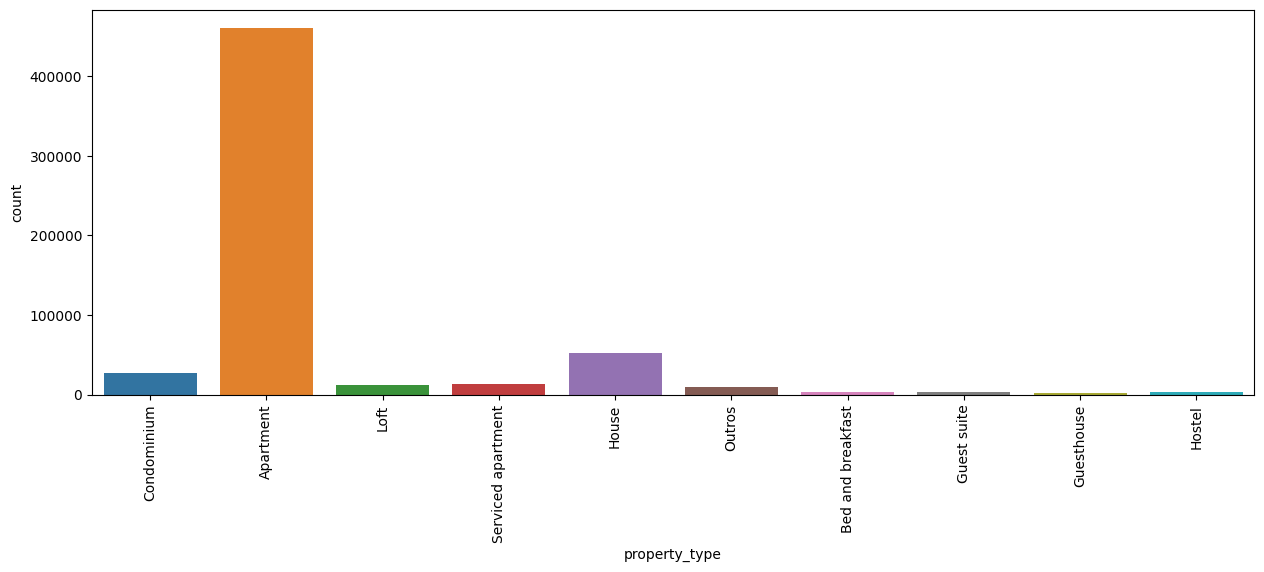

In [64]:
graf_texto(bs_airbnb, 'property_type')

### room_type

Entire home/apt    373671
Private room       198344
Shared room         11845
Hotel room            967
Name: room_type, dtype: int64


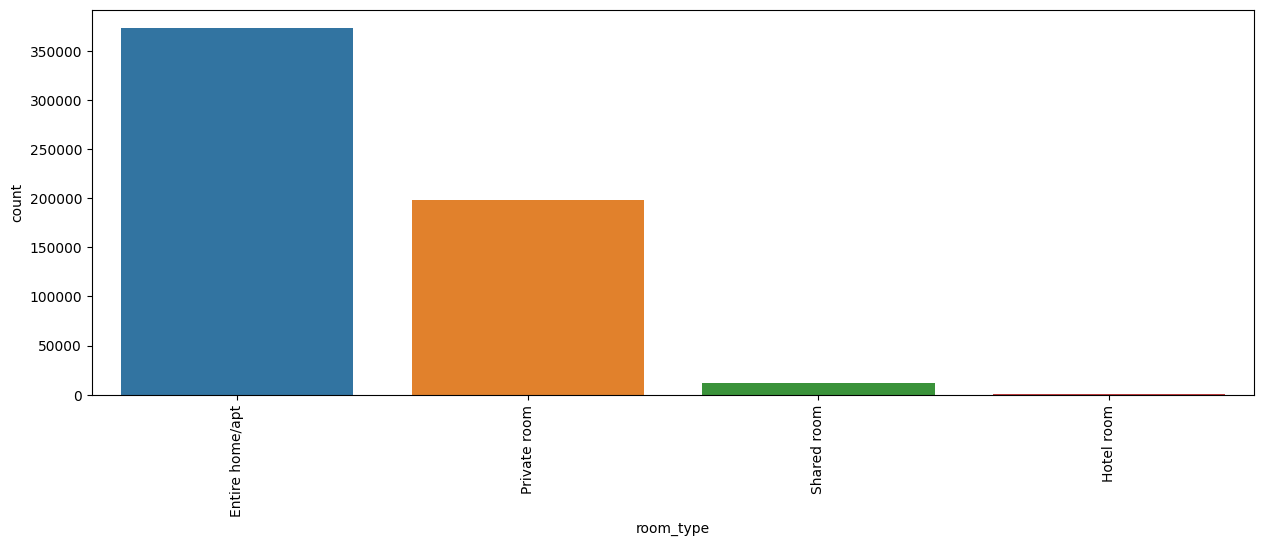

In [65]:
print(bs_airbnb['room_type'].value_counts())
graf_texto(bs_airbnb, 'room_type')

#### Como temos apenas 4 categorias, iremos permanecer como estamos

### bed_type

Real Bed         573468
Pull-out Sofa      8074
Futon              1634
Airbed             1155
Couch               496
Name: bed_type, dtype: int64


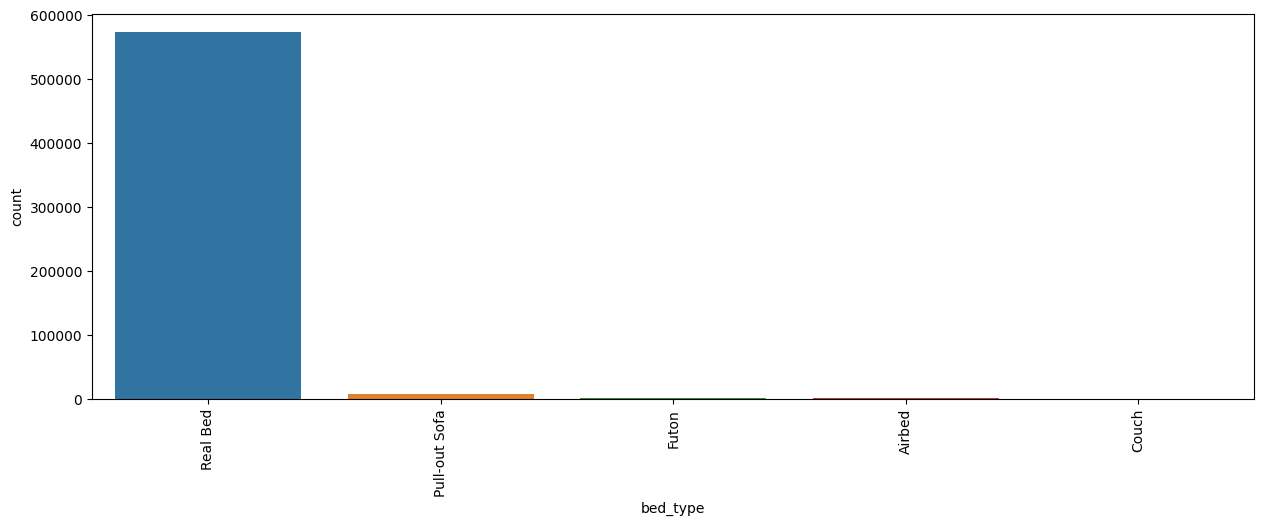

In [66]:
print(bs_airbnb['bed_type'].value_counts())
graf_texto(bs_airbnb, 'bed_type')

In [67]:
agrupar(bs_airbnb, 'bed_type', 'outras_camas', 9000)
print(bs_airbnb['bed_type'].value_counts())


Real Bed        573468
outras_camas     11359
Name: bed_type, dtype: int64


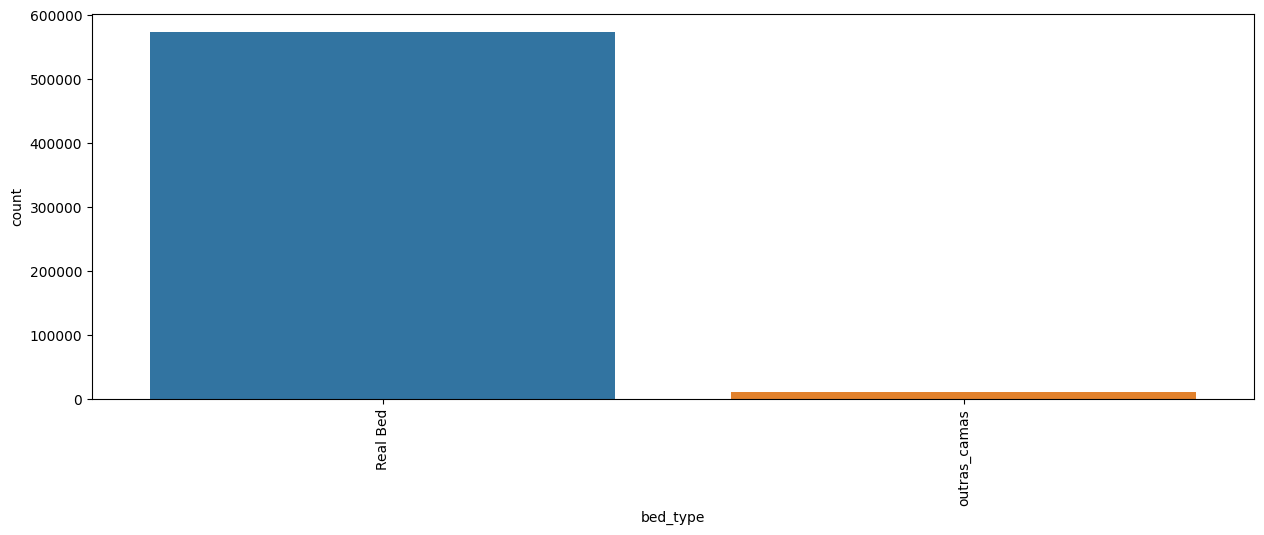

In [68]:
graf_texto(bs_airbnb, 'bed_type')

### cancellation_policy 

flexible                       260025
strict_14_with_grace_period    201249
moderate                       113671
strict                           9715
super_strict_60                   135
super_strict_30                    32
Name: cancellation_policy, dtype: int64


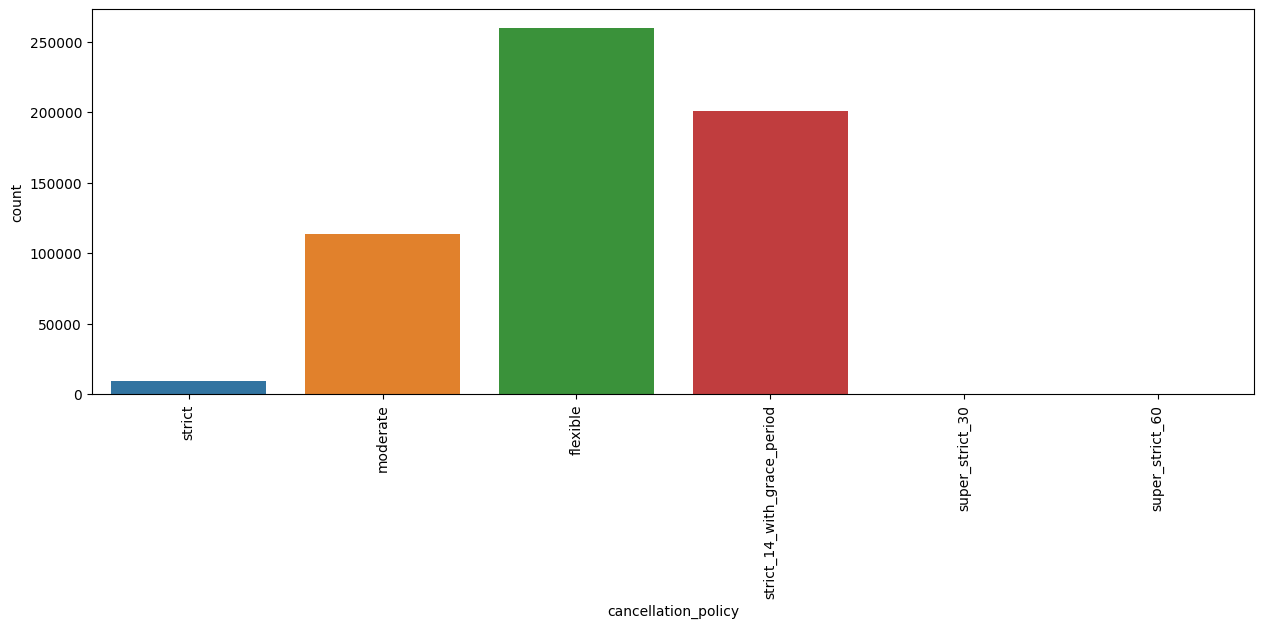

In [69]:
graf_texto(bs_airbnb, 'cancellation_policy')
print(bs_airbnb['cancellation_policy'].value_counts())

flexible                       260025
strict_14_with_grace_period    201249
moderate                       113671
strict                           9882
Name: cancellation_policy, dtype: int64


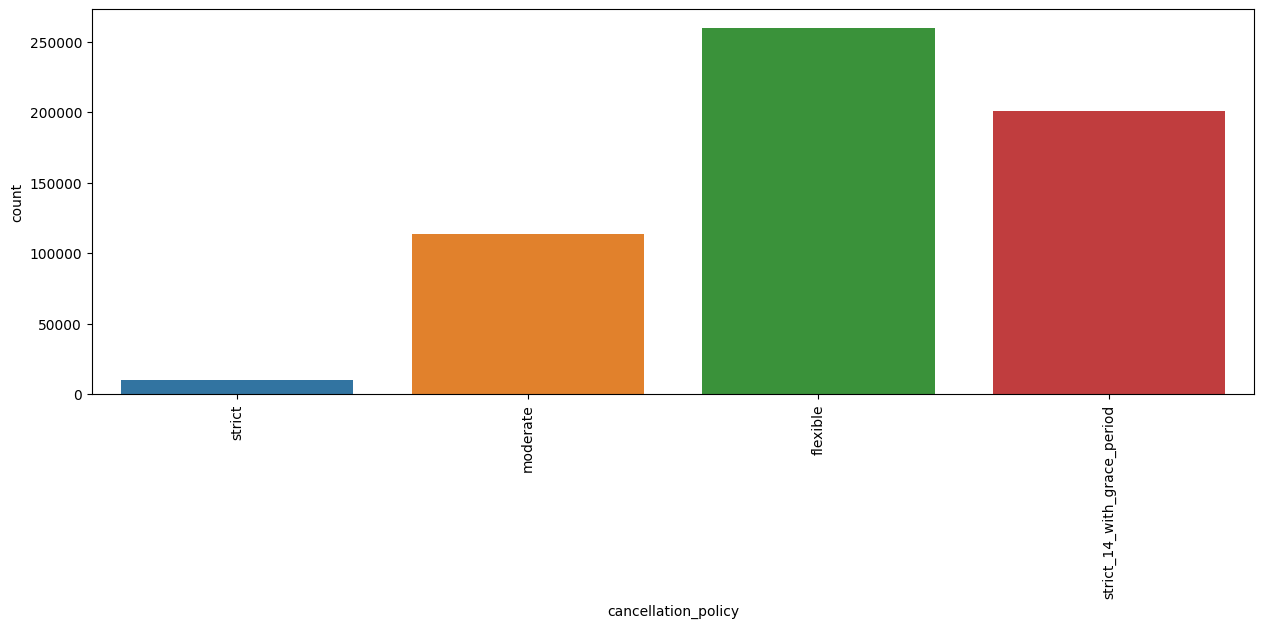

In [70]:
agrupar(bs_airbnb, 'cancellation_policy', 'strict', 10000)
print(bs_airbnb['cancellation_policy'].value_counts())
graf_texto(bs_airbnb, 'cancellation_policy')

### amenities 

- Como nós temos muitos amenities, e de vez em quando, os mesmos amenities. Iremos criar uma nova coluna com a **quantidade** de amentities ao em vez de uma lista com cada amenitie

In [71]:
print(bs_airbnb['amenities'].iloc[0].split(','))
print(len(bs_airbnb['amenities'].iloc[0].split(',')))

['{TV', '"Cable TV"', 'Internet', 'Wifi', '"Air conditioning"', 'Kitchen', '"Paid parking off premises"', '"Smoking allowed"', 'Doorman', 'Elevator', '"Hot tub"', '"Family/kid friendly"', '"Suitable for events"', 'Essentials', '"24-hour check-in"', 'Hangers', '"Hair dryer"', 'Iron', '"Laptop friendly workspace"', '"Self check-in"', '"Front desk/doorperson"', '"Private entrance"', '"Hot water"', '"Bed linens"', '"Luggage dropoff allowed"}']
25


In [72]:
bs_airbnb['n_amenities'] = bs_airbnb['amenities'].str.split(',').apply(len)

In [73]:
bs_airbnb = bs_airbnb.drop('amenities', axis=1)

In [74]:
bs_airbnb['n_amenities']

1        25
3        14
4        16
5        30
6        30
         ..
34323    15
34324    18
34325    12
34327    25
34328    17
Name: n_amenities, Length: 584827, dtype: int64

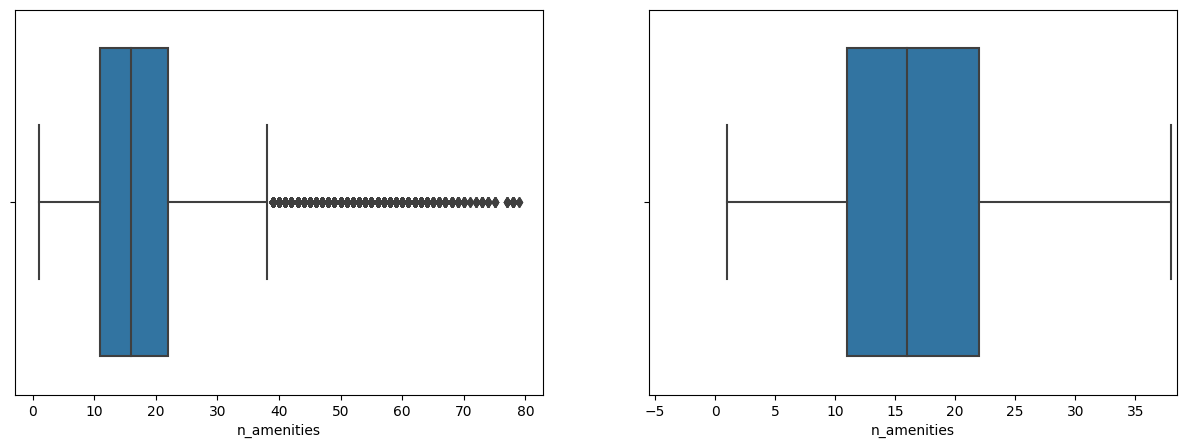

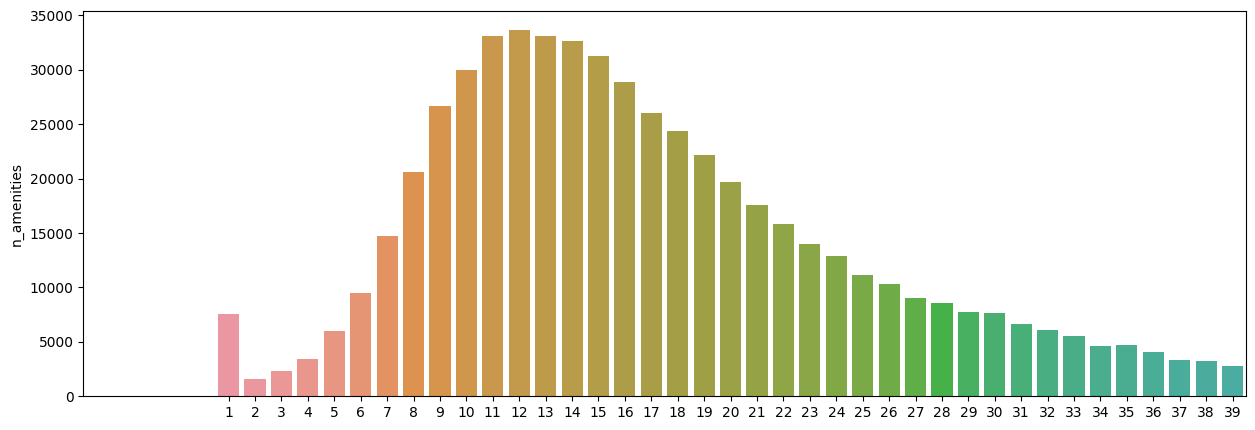

In [75]:
caixa_plot(bs_airbnb['n_amenities'])
barras(bs_airbnb['n_amenities'])

In [76]:
bs_airbnb, linhas_excluidas = excluir_outliers(bs_airbnb, 'n_amenities')
print('{} linhas removidas'.format(linhas_excluidas))

24343 linhas removidas


## Vizualização de mapa dos imóveis

In [77]:
amostra = bs_airbnb.sample(n=40000)
mapa_centro = {'lat':amostra.latitude.mean(), 'lon':amostra.longitude.mean()}
fig = px.density_mapbox(amostra, lat='latitude', lon='longitude', z='price', radius=2.5,
                        center=mapa_centro, zoom=10, mapbox_style='open-street-map')

fig.show()

## Encoding

### Colunas de True ou False

In [78]:
bs_airbnb_cod = bs_airbnb.copy()
print(bs_airbnb_cod.iloc[0])

host_is_superhost                          t
host_total_listings_count                2.0
latitude                          -22.965919
longitude                         -43.178962
property_type                    Condominium
room_type                    Entire home/apt
accommodates                               5
bathrooms                                1.0
bedrooms                                 2.0
beds                                     2.0
bed_type                            Real Bed
price                                  270.0
extra_people                            51.0
minimum_nights                             4
instant_bookable                           t
is_business_travel_ready                   f
cancellation_policy                   strict
ano                                     2018
mes                                        4
n_amenities                               25
Name: 1, dtype: object


In [79]:
coll_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
for coll in coll_tf:
    bs_airbnb_cod.loc[bs_airbnb_cod[coll]=='t', coll] = 1
    bs_airbnb_cod.loc[bs_airbnb_cod[coll]=='f', coll] = 0
print(bs_airbnb_cod.iloc[0])

host_is_superhost                          1
host_total_listings_count                2.0
latitude                          -22.965919
longitude                         -43.178962
property_type                    Condominium
room_type                    Entire home/apt
accommodates                               5
bathrooms                                1.0
bedrooms                                 2.0
beds                                     2.0
bed_type                            Real Bed
price                                  270.0
extra_people                            51.0
minimum_nights                             4
instant_bookable                           1
is_business_travel_ready                   0
cancellation_policy                   strict
ano                                     2018
mes                                        4
n_amenities                               25
Name: 1, dtype: object


### Colunas de texto

In [80]:
coll_text = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']

In [81]:
bs_airbnb_cod = pd.get_dummies(data=bs_airbnb_cod, columns=coll_text)
display(bs_airbnb_cod.head())

host_is_superhost  host_total_listings_count   latitude  longitude  \
1                 1                        2.0 -22.965919 -43.178962   
3                 0                        3.0 -22.977117 -43.190454   
4                 1                        1.0 -22.983024 -43.214270   
5                 1                        1.0 -22.988165 -43.193588   
6                 1                        1.0 -22.981269 -43.190457   

   accommodates  bathrooms  bedrooms  beds  price  extra_people  ...  \
1             5        1.0       2.0   2.0  270.0          51.0  ...   
3             3        1.0       1.0   2.0  161.0          45.0  ...   
4             3        1.0       1.0   2.0  222.0          68.0  ...   
5             3        1.5       1.0   2.0  308.0          86.0  ...   
6             2        1.0       1.0   2.0  219.0          80.0  ...   

   room_type_Entire home/apt room_type_Hotel room room_type_Private room  \
1                          1                    0                      0   
3                          1                    0                      0   
4                          1                    0                      0   
5                          1                    0                      0   
6                          1                    0                      0   

   room_type_Shared room  bed_type_Real Bed  bed_type_outras_camas  \
1                      0                  1                      0   
3                      0                  1                      0   
4                      0                  1                      0   
5                      0                  1                      0   
6                      0                  1                      0   

   cancellation_policy_flexible  cancellation_policy_moderate  \
1                             0                             0   
3                             0                             0   
4                             0                             0   
5                             0                             0   
6                             0                             0   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
1                           1                                                0  
3                           1                                                0  
4                           1                                                0  
5                           1                                                0  
6                           1                                                0  

[5 rows x 36 columns]

## Construção do modelo

### Escolhendo os modelos
1. RandomForest
2. LinearRegression
3. Extra Tree

In [82]:
modelo_rft = RandomForestRegressor()
modelo_exr = ExtraTreesRegressor()
modelo_lr = LinearRegression()

In [83]:
modelos = {'RandomForest': modelo_rft,
          'ExtraTree': modelo_exr,
          'LinearRegression': modelo_lr
          }

### Separação de features e labels

In [84]:
x = bs_airbnb_cod.drop('price', axis=1)
y = bs_airbnb['price']
x

host_is_superhost  host_total_listings_count   latitude  longitude  \
1                     1                        2.0 -22.965919 -43.178962   
3                     0                        3.0 -22.977117 -43.190454   
4                     1                        1.0 -22.983024 -43.214270   
5                     1                        1.0 -22.988165 -43.193588   
6                     1                        1.0 -22.981269 -43.190457   
...                 ...                        ...        ...        ...   
34323                 0                        1.0 -22.986030 -43.191660   
34324                 0                        0.0 -23.003180 -43.342840   
34325                 0                        0.0 -22.966640 -43.393450   
34327                 0                        0.0 -23.003400 -43.341820   
34328                 0                        5.0 -23.010560 -43.363350   

       accommodates  bathrooms  bedrooms  beds  extra_people  minimum_nights  \
1                 5        1.0       2.0   2.0          51.0               4   
3                 3        1.0       1.0   2.0          45.0               4   
4                 3        1.0       1.0   2.0          68.0               2   
5                 3        1.5       1.0   2.0          86.0               2   
6                 2        1.0       1.0   2.0          80.0               3   
...             ...        ...       ...   ...           ...             ...   
34323             4        2.0       2.0   3.0           0.0               1   
34324             4        1.0       0.0   2.0          50.0               1   
34325             4        2.0       2.0   3.0           0.0               2   
34327             4        1.0       1.0   1.0           0.0               1   
34328             2        0.0       1.0   1.0          80.0               1   

       ... room_type_Entire home/apt room_type_Hotel room  \
1      ...                         1                    0   
3      ...                         1                    0   
4      ...                         1                    0   
5      ...                         1                    0   
6      ...                         1                    0   
...    ...                       ...                  ...   
34323  ...                         1                    0   
34324  ...                         1                    0   
34325  ...                         1                    0   
34327  ...                         1                    0   
34328  ...                         0                    0   

       room_type_Private room  room_type_Shared room  bed_type_Real Bed  \
1                           0                      0                  1   
3                           0                      0                  1   
4                           0                      0                  1   
5                           0                      0                  1   
6                           0                      0                  1   
...                       ...                    ...                ...   
34323                       0                      0                  1   
34324                       0                      0                  1   
34325                       0                      0                  1   
34327                       0                      0                  1   
34328                       1                      0                  1   

       bed_type_outras_camas  cancellation_policy_flexible  \
1                          0                             0   
3                          0                             0   
4                          0                             0   
5                          0                             0   
6                          0                             0   
...                      ...                           ...   
34323                      0                             1   
34

### Separar os dados em treino e teste

In [85]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)
x_treino

host_is_superhost  host_total_listings_count   latitude  longitude  \
24926                 0                        1.0 -23.004290 -43.307860   
25228                 0                        1.0 -22.846350 -43.358910   
3669                  0                        1.0 -22.979064 -43.192181   
27876                 0                        4.0 -22.980820 -43.418751   
22182                 0                        1.0 -22.917270 -43.207100   
...                 ...                        ...        ...        ...   
27065                 0                        2.0 -23.012870 -43.442780   
19460                 0                        1.0 -22.976016 -43.228560   
4887                  1                        4.0 -22.961610 -43.174290   
26988                 1                        5.0 -22.984681 -43.204391   
10658                 0                        5.0 -22.962323 -43.167853   

       accommodates  bathrooms  bedrooms  beds  extra_people  minimum_nights  \
24926             3        1.0       1.0   3.0           0.0               1   
25228             6        2.0       1.0   2.0          70.0               1   
3669              4        2.0       2.0   3.0           0.0               3   
27876             4        2.0       2.0   4.0           0.0               2   
22182             2        1.0       1.0   1.0          40.0               1   
...             ...        ...       ...   ...           ...             ...   
27065             2        2.0       1.0   1.0          40.0               1   
19460             5        2.0       3.0   4.0           0.0               7   
4887              5        1.0       1.0   3.0          30.0               2   
26988             2        2.0       1.0   1.0           0.0               2   
10658             4        1.5       2.0   4.0         100.0               3   

       ... room_type_Entire home/apt room_type_Hotel room  \
24926  ...                         1                    0   
25228  ...                         0                    0   
3669   ...                         1                    0   
27876  ...                         1                    0   
22182  ...                         0                    0   
...    ...                       ...                  ...   
27065  ...                         0                    0   
19460  ...                         1                    0   
4887   ...                         1                    0   
26988  ...                         0                    0   
10658  ...                         1                    0   

       room_type_Private room  room_type_Shared room  bed_type_Real Bed  \
24926                       0                      0                  1   
25228                       0                      1                  1   
3669                        0                      0                  1   
27876                       0                      0                  1   
22182                       1                      0                  1   
...                       ...                    ...                ...   
27065                       1                      0                  1   
19460                       0                      0                  1   
4887                        0                      0                  1   
26988                       1                      0                  1   
10658                       0                      0                  1   

       bed_type_outras_camas  cancellation_policy_flexible  \
24926                      0                             1   
25228                      0                             0   
3669                       0                             0   
27876                      0                             0   
22182                      0                             1   
...                      ...                           ...   
27065                      0                             1   
19

## Análise do melhor modelo

In [ ]:
for nome_modelo, modelo in modelos.items():
    modelo.fit(x_treino, y_treino)
    previsao = modelo.predict(x_teste)
    print(modelo.score(y_teste, previsao))

#### O modelo de ExtraTreesRegressor é o melhor modelo

## Ajustes e melhorias no modelo

In [93]:
bs_airbnb_cod.to_csv('bs_airbnb.csv')

In [ ]:
modelo_exr.fit(x_treino, y_treino)
previsao1 = modelo.predict(x_teste)
print(modelo.score(y_teste, previsao))

In [ ]:
print(modelo_exr.feature_importances_)

In [ ]:
feature_imp = pd.DataFrame(modelo_exr.feature_importances_ * 100, x_treino.columns)
display(feature_imp.sort_values(by=0, ascending=False))

In [ ]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x=feature_imp.index, y=feature_imp[0])
ax.tick_params(axis= 'x', rotation=90)
# ax.set_xlim(limite(coluna))

#### Podemos perceber que características como latitude, longitude, ñ de quartos, etc são muito relevantes para a boa previsão do nosso modelo. Porém, características como 'is_business_travel_ready', não complementam em nada para o nosso modelo

### Retirando coluna irrelevante

In [ ]:
bs_airbnb_cod = bs_airbnb_cod.drop('is_business_travel_ready', axis=1)

In [ ]:
x = bs_airbnb_cod.drop('price', axis=1)
y = bs_airbnb['price']

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
modelo_exr.fit(x_treino, y_treino)
preds = modelo_exr.predict(x_teste)
modelo_exr.score(y_teste, preds)

In [ ]:
x['price'] = y
x.to_csv('dados.csv')